# Analyzing Data with Pandas and Visualizing Results with Matplotlib

# Superstore Sales Data Analysis  

The Superstore dataset contains sales records from a fictional retail store operating in the USA between **2014 and 2018**.  
It includes details about orders, products, customers, and shipping, with key fields such as **Sales, Profit, Discount, Quantity, Region, and Category**.

The dataset is widely used for practicing data analysis and visualization, offering insights into business performance, customer behavior, and profitability trends.  

**Dataset Source:** [Kaggle – Superstore Sales Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)  


### Objectives
- To load and analyze a dataset using the **pandas** library in Python.  
- To clean and prepare the dataset for analysis.  
- To explore basic statistics and identify patterns in the data.  
- To create simple plots and charts using the **matplotlib** and **seaborn** libraries for effective visualization. 


##### 1. Choose a dataset in CSV format (for example, you can use datasets like the Iris dataset, a sales dataset, or any dataset of your choice).

# Task 1: Load and Explore the Dataset

#### 2. Load the dataset using pandas.
#### Error Handling:
- Handle possible errors during the file reading (e.g., file not found), missing data, or incorrect data types by using exception-handling mechanisms (try, except).

In [1]:
import pandas as pd

try:
    # Load CSV with Order ID as index; index_col=1 uses Order ID
    sales_data = pd.read_csv("superstore_sales.csv", encoding='latin1', index_col=1) # latin1 handles extra characters like 0xa0 which UTF-8 can’t decode.  
    sales_data = sales_data.drop(columns=['Row ID']) # It is a sequential identifier that adds no meaningful information.
    
    print("✅ Dataset loaded successfully")
    
except FileNotFoundError:
    print("❌ File not found. Check your file path")

✅ Dataset loaded successfully


#### 3. Display the first few rows of the dataset using .head() to inspect the data.

In [2]:
print(sales_data.head()) # Shows first 5 rows

                Order Date   Ship Date       Ship Mode Customer ID  \
Order ID                                                             
CA-2016-152156  11 08 2016  11 11 2016    Second Class    CG-12520   
CA-2016-152156  11 08 2016  11 11 2016    Second Class    CG-12520   
CA-2016-138688   6 12 2016   6/16/2016    Second Class    DV-13045   
US-2015-108966  10 11 2015  10/18/2015  Standard Class    SO-20335   
US-2015-108966  10 11 2015  10/18/2015  Standard Class    SO-20335   

                  Customer Name    Segment        Country             City  \
Order ID                                                                     
CA-2016-152156      Claire Gute   Consumer  United States        Henderson   
CA-2016-152156      Claire Gute   Consumer  United States        Henderson   
CA-2016-138688  Darrin Van Huff  Corporate  United States      Los Angeles   
US-2015-108966   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
US-2015-108966   Sean O'Donnell   Consume

#### 4. Explore the structure of the dataset by checking the data types and any missing values.

In [3]:
# Check for data types
print(sales_data.info())

# Convert Postal Code from int64 to string (object) type
sales_data['Postal Code'] = sales_data['Postal Code'].astype(str)

print()

# confirm
print(sales_data.info())

print()

# Check for missing values
print(sales_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, CA-2016-152156 to CA-2017-119914
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9994 non-null   object 
 1   Ship Date      9994 non-null   object 
 2   Ship Mode      9994 non-null   object 
 3   Customer ID    9994 non-null   object 
 4   Customer Name  9994 non-null   object 
 5   Segment        9994 non-null   object 
 6   Country        9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Postal Code    9994 non-null   int64  
 10  Region         9994 non-null   object 
 11  Product ID     9994 non-null   object 
 12  Category       9994 non-null   object 
 13  Sub-Category   9994 non-null   object 
 14  Product Name   9994 non-null   object 
 15  Sales          9994 non-null   float64
 16  Quantity       9994 non-null   int64  
 17  Discount       9994 non-null   flo

#### 5. Clean the dataset by either filling or dropping any missing values.

In [4]:
# Drop rows with missing values
sales_data = sales_data.dropna()

In [5]:
# ---- Standardize Date Columns ----
print(sales_data['Order Date'].head(20))      # First 20 rows
print(sales_data['Ship Date'].unique()[:30]) # First 30 unique values

Order ID
CA-2016-152156    11 08 2016
CA-2016-152156    11 08 2016
CA-2016-138688     6 12 2016
US-2015-108966    10 11 2015
US-2015-108966    10 11 2015
CA-2014-115812     6 09 2014
CA-2014-115812     6 09 2014
CA-2014-115812     6 09 2014
CA-2014-115812     6 09 2014
CA-2014-115812     6 09 2014
CA-2014-115812     6 09 2014
CA-2014-115812     6 09 2014
CA-2017-114412     4/15/2017
CA-2016-161389    12 05 2016
US-2015-118983    11/22/2015
US-2015-118983    11/22/2015
CA-2014-105893    11 11 2014
CA-2014-167164     5/13/2014
CA-2014-143336     8/27/2014
CA-2014-143336     8/27/2014
Name: Order Date, dtype: object
['11 11 2016' '6/16/2016' '10/18/2015' '6/14/2014' '4/20/2017'
 '12 10 2016' '11/26/2015' '11/18/2014' '5/15/2014' '9 01 2014'
 '12/13/2016' '7/18/2017' '9/30/2015' '1/20/2016' '9/21/2015' '10/23/2017'
 '12/31/2015' '9/15/2017' '7/22/2016' '9/23/2017' '3/13/2016' '10/25/2014'
 '6/25/2016' '4/22/2015' '12/17/2016' '6/18/2016' '11/30/2015' '5 05 2015'
 '12 10 2014' '6 06 2016']


In [6]:
# Convert both Order Date and Ship Date into a consistent datetime format
# Replace spaces with slashes in both date columns using regex
sales_data['Order Date'] = sales_data['Order Date'].astype(str).str.strip().str.replace(r"[^\d/]", "/", regex=True) # remove leading/trailing spaces
sales_data['Ship Date']  = sales_data['Ship Date'].astype(str).str.strip().str.replace(r"[^\d/]", "/", regex=True)

# # Parse to datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors="coerce")
sales_data['Ship Date']  = pd.to_datetime(sales_data['Ship Date'], errors="coerce")

print("Dataset cleaned and dates standardized!", sales_data.shape)

Dataset cleaned and dates standardized! (9994, 19)


# Task 2: Basic Data Analysis

#### 1. Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().

In [7]:
print("=== Basic Statistics ===")

# Basic statistics for numerical columns
print(sales_data[['Sales', 'Quantity', 'Discount', 'Profit']].describe())

=== Basic Statistics ===
              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


#### 2. Perform groupings on a categorical column and compute the mean of a numerical column for each group.

In [8]:
avg_profit_category = sales_data.groupby("Category")["Profit"].mean()
print("\n=== Average Profit per Product Category ===")
print(avg_profit_category)


=== Average Profit per Product Category ===
Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


#### 3. Identify any patterns or interesting findings from your analysis.

In [9]:
# (a). Region with the highest average sales
avg_sales_region = sales_data.groupby("Region")["Sales"].mean()
max_region = avg_sales_region.idxmax() # returns region index label where the series is maximum
max_sales = avg_sales_region.max()
print(f"Region with the highest average sales: {max_region} ({max_sales:.2f})")

print()

# (b). Profit as a Percentage of Total Revenue (Sales)
# Sum of Sales per category
total_sales_category = sales_data.groupby("Category")["Sales"].sum()

# Sum of Profit per category
total_profit_category = sales_data.groupby("Category")["Profit"].sum()

# Profit margin (%)
profit_margin_category = (total_profit_category / total_sales_category) * 100
print("=== Profit Margin (%) per Category ===")
print(profit_margin_category.round(2))


Region with the highest average sales: South (241.80)

=== Profit Margin (%) per Category ===
Category
Furniture           2.49
Office Supplies    17.04
Technology         17.40
dtype: float64


# Task 3: Data Visualization

#### 1. Create at least four different types of visualizations:
- **Line chart** showing trends over time (for example, a time-series of sales data).
- **Bar chart** showing the comparison of a numerical value across categories.
- **Histogram** of a numerical column to understand its distribution.
- **Scatter plot** to visualize the relationship between two numerical columns.
#### 2. Customize your plots with titles, labels for axes, and legends where necessary

#### Plot Customization:
- Customize the plots using the matplotlib library to add titles, axis labels, and legends.
- Use seaborn for additional plotting styles, which can make your charts more visually appealing.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#  Set style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']

[6.4, 4.8]

##### i. Line Chart: Sales trend over time

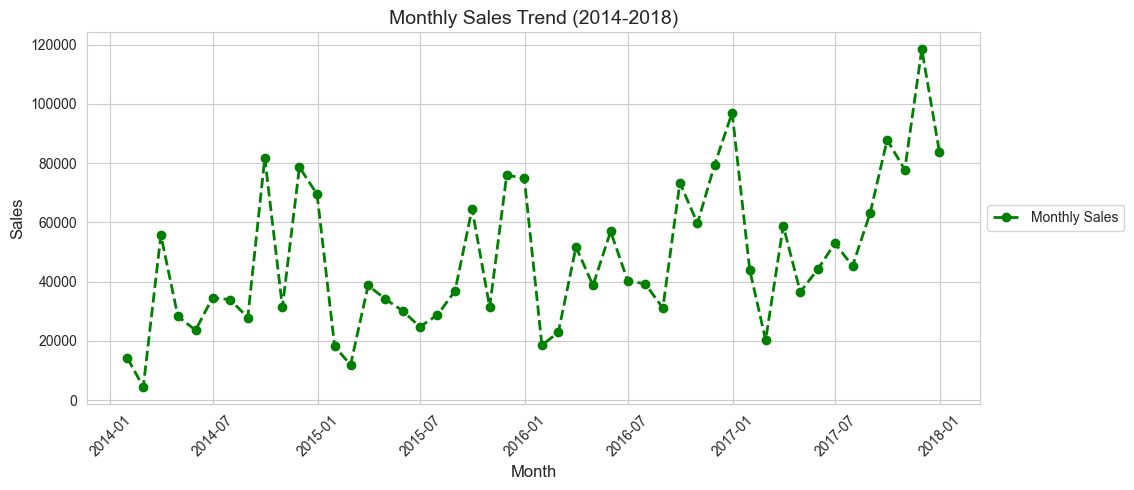

In [12]:
# Order Date as datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Aggregate sales by month (Month End)
monthly_sales = sales_data.resample('ME', on='Order Date')['Sales'].sum()

# Plot
plt.figure(figsize=(10,5))
plt.plot( monthly_sales.index, monthly_sales.values, marker='o', linestyle='--', linewidth=2, color='green', label='Monthly Sales')
plt.title("Monthly Sales Trend (2014-2018)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

##### Sales show an overall upward trend from 2014 to 2018, with noticeable seasonal peaks and dips.


##### ii. Bar Chart: Average Sales per Region

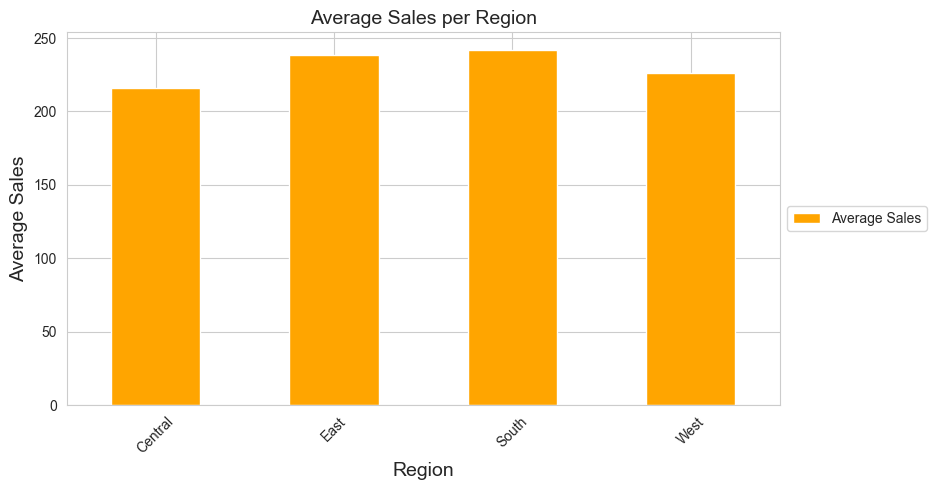

In [13]:
plt.figure(figsize=(8,5))
avg_sales_region.plot(kind='bar', color='orange', label='Average Sales')
plt.title("Average Sales per Region", fontsize=14)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Average Sales", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


##### The South and East regions record the highest average sales, while the Central region has the lowest.

##### iii. Histogram: Distribution of Sales

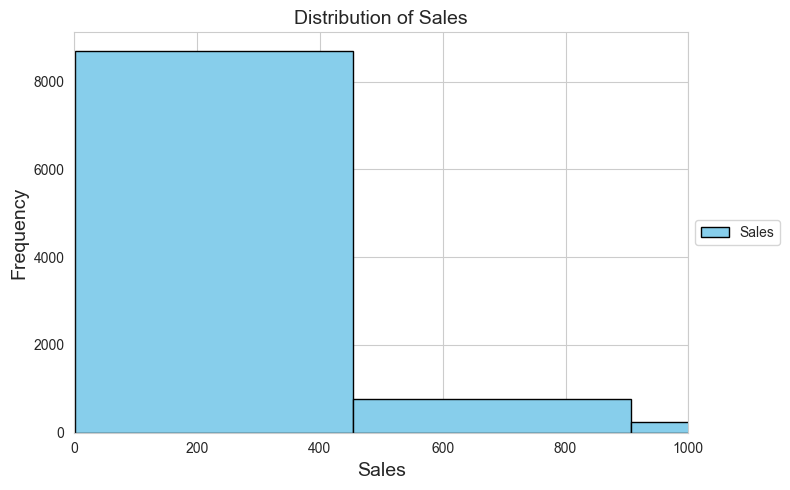

In [14]:
plt.figure(figsize=(8,5))
plt.hist(sales_data['Sales'], bins=50, color='skyblue', edgecolor='black', label='Sales')
plt.title("Distribution of Sales", fontsize=14)
plt.xlabel("Sales", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlim(0, 1000)  # Show only sales up to 1000
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

##### Majority of transactions are clustered at lower sales values (below USD 500). Limiting the range to $0–1000 highlights typical sales pattern which would otherwise be overshadowed by a few extreme outliers. This indicates that while large sales exist, the business relies heavily on a high volume of smaller transactions.

##### iv. Scatter Plot: Sales vs Profit by Product Category

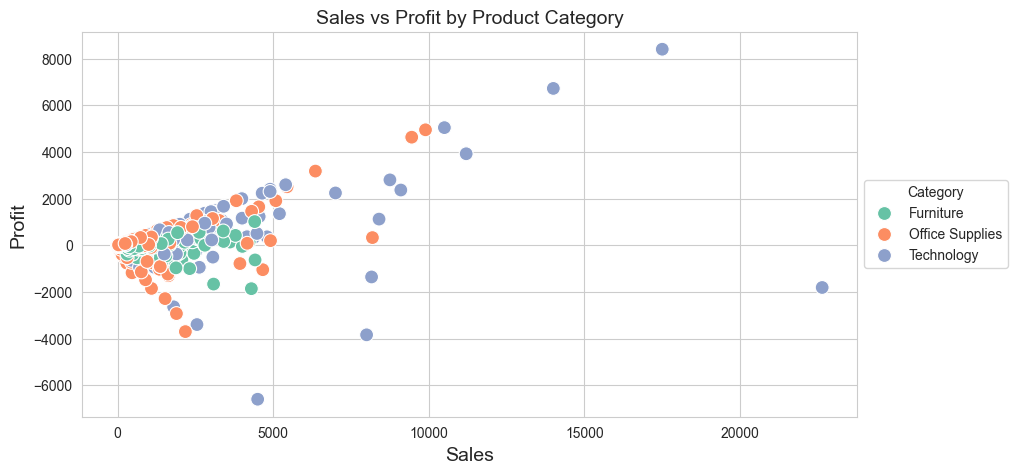

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sales_data, x='Sales', y='Profit', hue='Category', palette="Set2", s=100)
plt.title("Sales vs Profit by Product Category", fontsize=14)
plt.xlabel("Sales", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.legend(title="Category", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

##### Profitability varies widely across product categories, indicating that high sales values do not always translate into high profits. Technology products drive the highest sales and profits but also show large outliers with losses, while Furniture remains stable with moderate profits, and Office Supplies yield small but steady profits.

# Conclusion

The analysis showed that:
- Sales steadily increased over time, with noticeable fluctuations across months.
- The East and South regions recorded the highest average sales.
- Technology was the most profitable product category overall.
- Most sales transactions were concentrated at lower values, with a few outliers at very high sales.

This analysis demonstrates how pandas and matplotlib can be used to clean, explore, and visualize real-world datasets.
